In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin

from imblearn.over_sampling import SMOTE

#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
color = sns.color_palette()
from IPython.display import display
from scipy.stats import norm, skew

In [1]:
import os
print(os.getcwd())

C:\Users\LENOVO\Desktop\python


In [7]:
HR = pd.read_excel("C:\\Users\\LENOVO\\Desktop\\python\\HR Analytics Python.xlsx")

In [8]:
print(HR.shape)
HR.head()

(15000, 10)


,satisfaction_level,last_evaluation,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary,ProjectCat
0,0.38,0.53,157,3,0,1,0,sales,low,Low Project
1,0.80,0.86,262,6,0,1,0,sales,medium,Medium Project
2,0.11,0.88,272,4,0,1,0,sales,medium,High Project
3,0.72,0.87,223,5,0,1,0,sales,low,Medium Project
4,0.37,0.52,159,3,0,1,0,sales,low,Low Project


In [5]:
HR = HR.drop(['names'], axis=1)

In [6]:
Nunique = HR.nunique()
Nunique = Nunique.sort_values()
Nunique

work_accident              2
left                       2
promotion_last_5years      2
salary                     3
number_project             6
exp_in_company             8
role                      10
last_evaluation           65
satisfaction_level        92
average_monthly_hours    215
dtype: int64

In [7]:
print(HR.shape)
HR.head()

(15000, 10)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
HR.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.612847,0.716115,3.803133,201.052400,3.498333,0.144600,0.238133,0.021267
std,0.248628,0.171171,1.232590,49.942074,1.460139,0.351709,0.425955,0.144277
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


# EDA

In [9]:
HR.left.value_counts()

0    11428
1     3572
Name: left, dtype: int64

E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


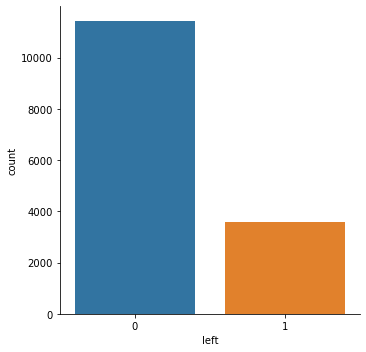

In [10]:
sns.factorplot(data=HR,kind='count',x='left')

In [10]:
HR.role.value_counts()

sales          4140
technical      2721
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: role, dtype: int64

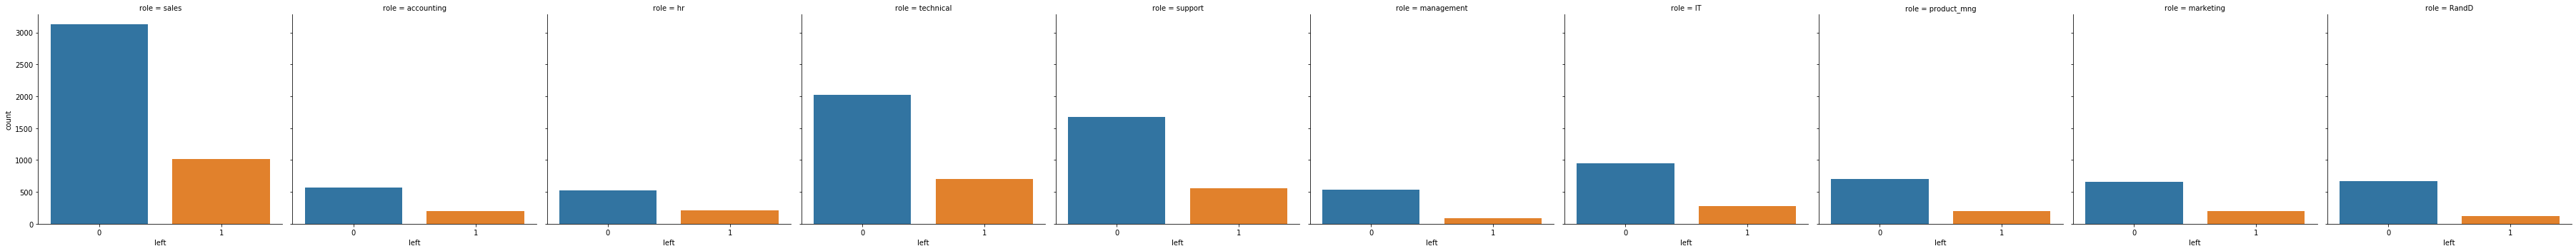

In [11]:
sns.factorplot(data=HR,kind='count',x='left', col='role')

In [12]:
HR.promotion_last_5years .value_counts()

0    14681
1      319
Name: promotion_last_5years, dtype: int64

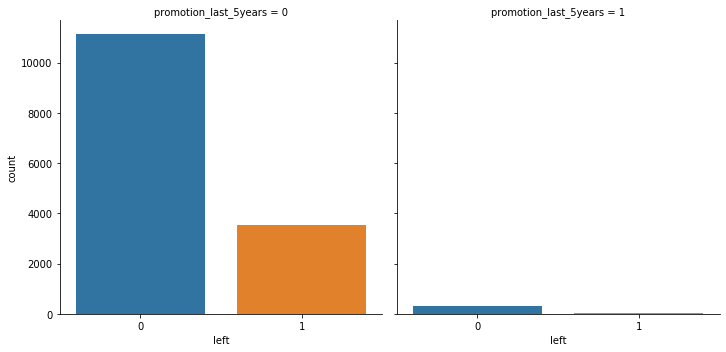

In [12]:
sns.factorplot(data=HR,kind='count',x='left', col='promotion_last_5years')

In [13]:
HR.salary.value_counts()

low       7317
medium    6446
high      1237
Name: salary, dtype: int64

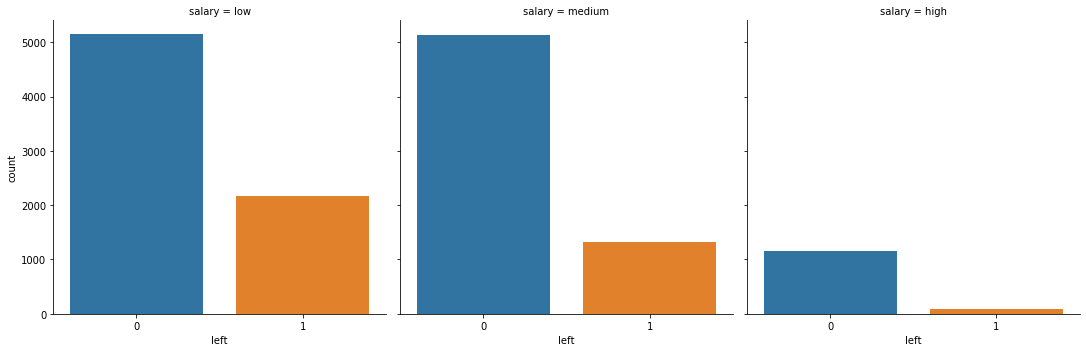

In [13]:
sns.factorplot(data=HR,kind='count',x='left', col='salary')

In [14]:
HR.work_accident.value_counts()

0    12831
1     2169
Name: work_accident, dtype: int64

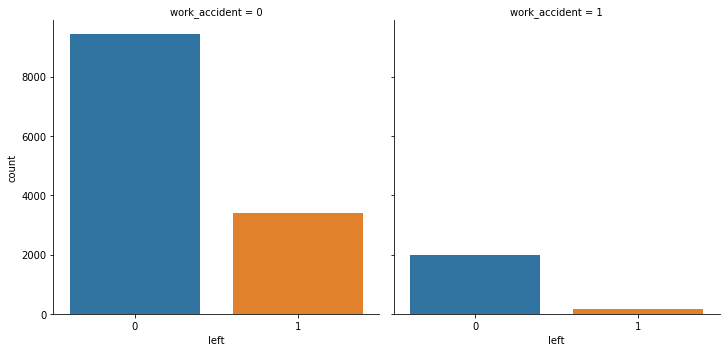

In [14]:
sns.factorplot(data=HR,kind='count',x='left', col='work_accident')

# Box plots conts data

In [15]:
Nunique = HR.nunique()
Nunique = Nunique.sort_values()
Nunique

work_accident                2
left                         2
promotion_last_5years        2
salary                       3
number_project               6
exp_in_company               8
role                        10
last_evaluation             65
satisfaction_level          92
average_monthly_hours      215
names                    14746
dtype: int64

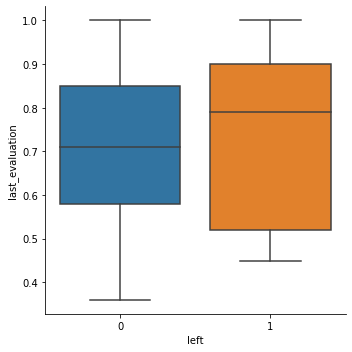

In [7]:
sns.factorplot(data=HR,y='last_evaluation',x='left',size=5,aspect=1,kind='box')

E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


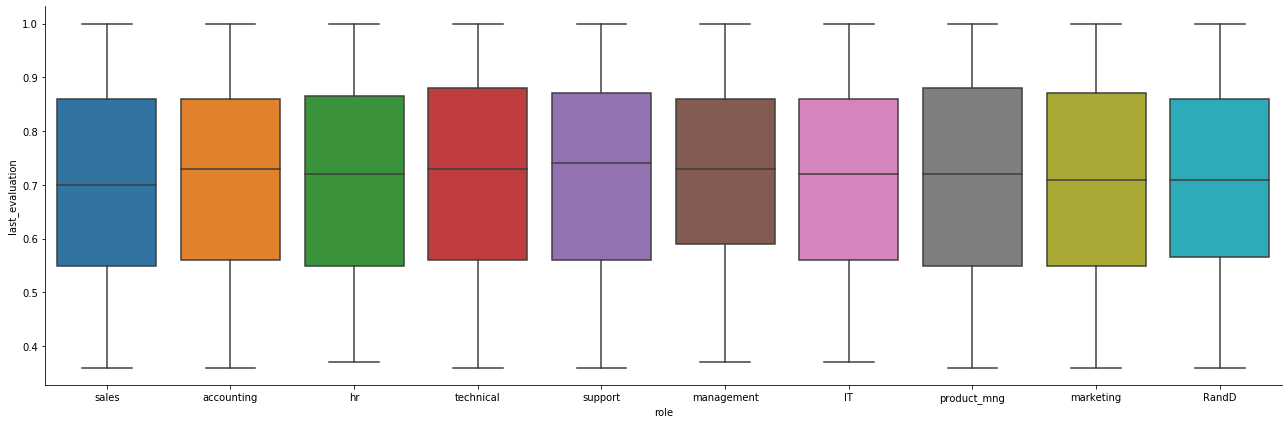

In [13]:
sns.factorplot(data=HR,y='last_evaluation',x='role',size=6,aspect=3,kind='box')

E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


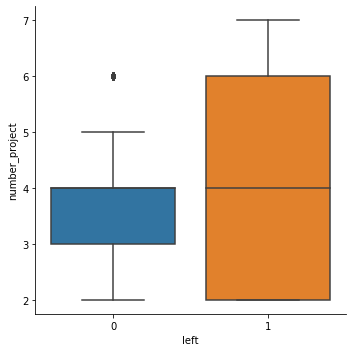

In [18]:
sns.factorplot(data=HR,y='number_project',x='left',size=5,aspect=1,kind='box')

E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


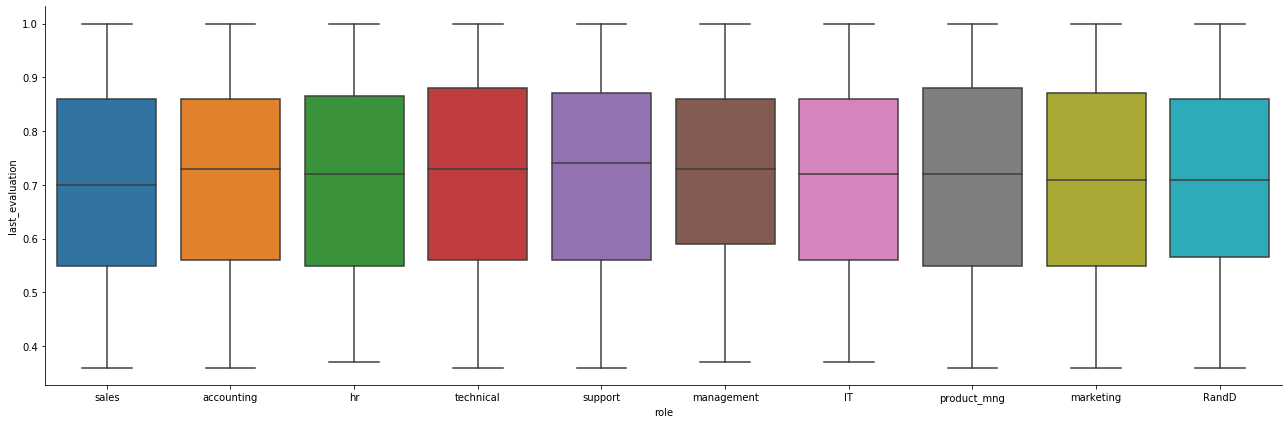

In [14]:
sns.factorplot(data=HR,y='last_evaluation',x='role',size=6,aspect=3,kind='box')

E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


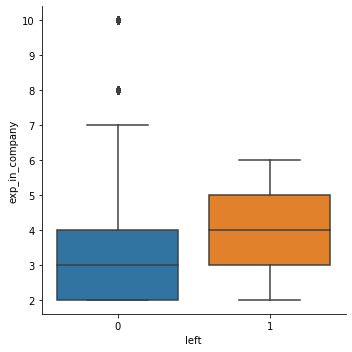

In [19]:
sns.factorplot(data=HR,y='exp_in_company',x='left',size=5,aspect=1,kind='box')

E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


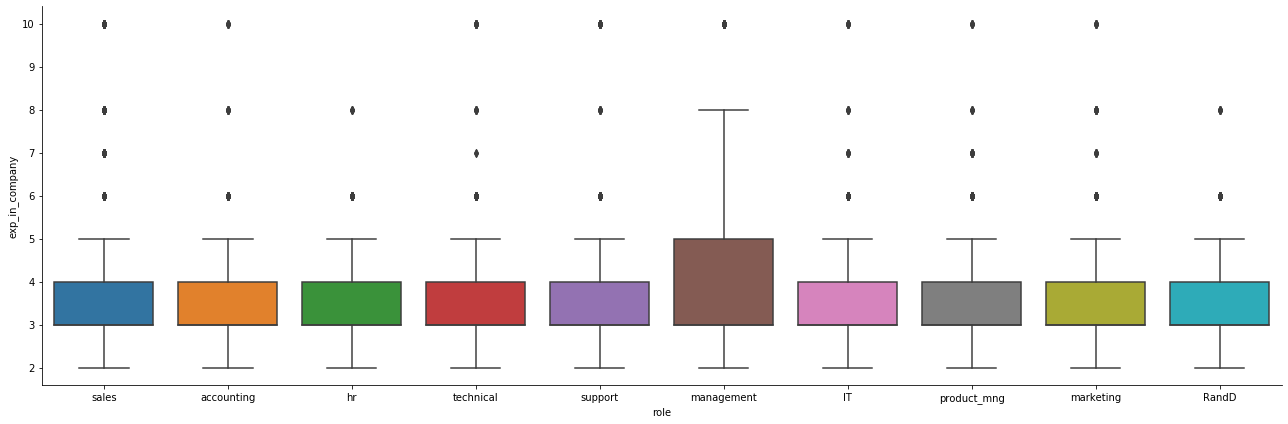

In [15]:
sns.factorplot(data=HR,y='exp_in_company',x='role',size=6,aspect=3,kind='box')

E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


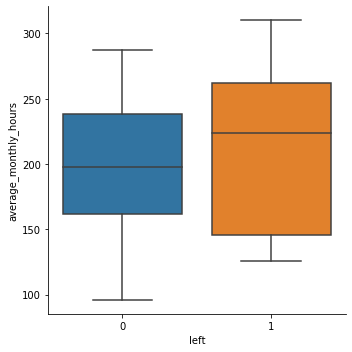

In [20]:
sns.factorplot(data=HR,y='average_monthly_hours',x='left',size=5,aspect=1,kind='box')

E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


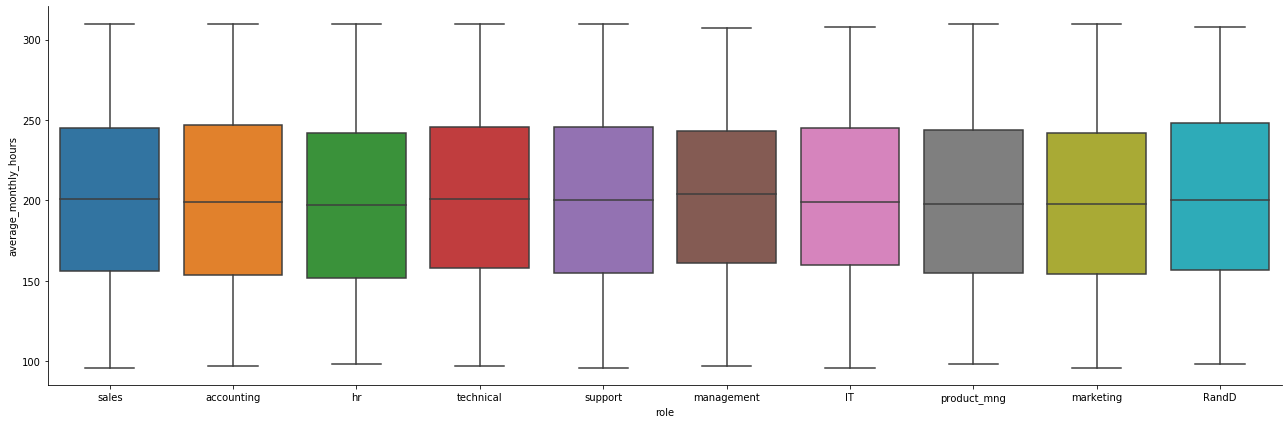

In [16]:
sns.factorplot(data=HR,y='average_monthly_hours',x='role',size=6,aspect=3,kind='box')

E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


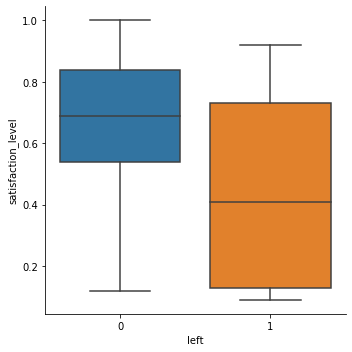

In [21]:
sns.factorplot(data=HR,y='satisfaction_level',x='left',size=5,aspect=1,kind='box')

E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
E:\New folder\envs\myenv\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


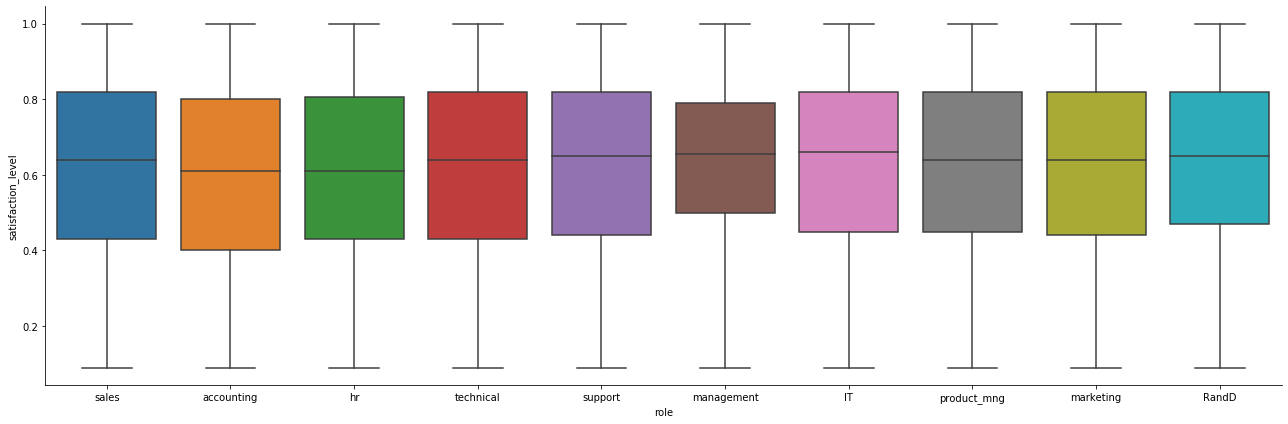

In [17]:
sns.factorplot(data=HR,y='satisfaction_level',x='role',size=6,aspect=3,kind='box')

# T test Cont Data
One Hot Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [35]:
print(HR.shape)
HR.head()

(15000, 19)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role_RandD,role_accounting,role_hr,role_management,role_marketing,role_product_mng,role_sales,role_support,role_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [36]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in HR.columns[1:]:
    if HR[col].dtype == 'object':
        if len(list(HR[col].unique())) <= 2:
            le.fit(HR[col])
            HR[col] = le.transform(HR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

0 columns were label encoded.


In [37]:
# convert rest of categorical variable into dummy
HR = pd.get_dummies(HR, drop_first=True)

print(HR.shape)
HR.head()

(15000, 19)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role_RandD,role_accounting,role_hr,role_management,role_marketing,role_product_mng,role_sales,role_support,role_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


# last_evaluation vs Left

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import researchpy as rp

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [40]:
from scipy.stats import ttest_ind
ttest_ind(HR.last_evaluation[HR.left == 0 ],HR.last_evaluation[HR.left == 1 ])

Ttest_indResult(statistic=-0.8206923162284726, pvalue=0.4118345922747414)

In [41]:
mean_No = HR.last_evaluation[HR.left == 0 ].mean()
mean_Yes = HR.last_evaluation [HR.left == 1 ].mean()
diff_mean = mean_No - mean_Yes
print(diff_mean)
print(mean_Yes)
print(mean_No)

-0.0026928947231236178
0.7181662933930572
0.7154733986699335


In [39]:
descriptives, results = rp.ttest(HR.last_evaluation[HR.left == 0 ],HR.last_evaluation[HR.left == 1 ])
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,last_evaluation,11428.0,0.715473,0.162005,0.001515,0.712503,0.718444
1,last_evaluation,3572.0,0.718166,0.197672,0.003307,0.711682,0.724651
2,combined,15000.0,0.716115,0.171171,0.001398,0.713375,0.718854


In [18]:
results

,Independent t-test,results
0,Difference (last_evaluation - last_evaluation) =,0.0027
1,Degrees of freedom =,14998.0000
2,t =,0.8207
3,Two side test p value =,0.4118
4,Difference > 0 p value =,0.7941
5,Difference < 0 p value =,0.2059
6,Cohen's d =,0.0157
7,Hedge's g =,0.0157
8,Glass's delta =,0.0136
9,r =,0.0067


In [11]:
model_name = ols('last_evaluation ~ C(left)', data=HR).fit()

In [12]:
results = ols('last_evaluation ~ C(left)', data=HR).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        last_evaluation   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6735
Date:                Thu, 24 Oct 2019   Prob (F-statistic):              0.412
Time:                        00:35:50   Log-Likelihood:                 5193.2
No. Observations:               15000   AIC:                        -1.038e+04
Df Residuals:                   14998   BIC:                        -1.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7155      0.002    446.832      0.000       0.712       0.719
C(left)[T.1]     0.0027      0.003      0.821      0.412      -0.004       0.009
==============================================================================
Omnibus:                    19791.845   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              962.381
Skew:                          -0.030   Prob(JB):                    1.05e-209
Kurtosis:                       1.761   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(left),0.019735,1.0,0.673536,0.411835
Residual,439.442228,14998.0,NaN,NaN


In [32]:
stats.levene(HR['last_evaluation'][HR['left'] == '1'],
             HR['last_evaluation'][HR['left'] == '0']),

E:\New folder\envs\myenv\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
E:\New folder\envs\myenv\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
E:\New folder\envs\myenv\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
E:\New folder\envs\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
E:\New folder\envs\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
E:\New folder\envs\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2

(LeveneResult(statistic=nan, pvalue=nan),)

# number_project vs left

In [11]:
from scipy.stats import ttest_ind
ttest_ind(HR.last_evaluation[HR.left == 0 ],HR.last_evaluation[HR.left == 1 ])

Ttest_indResult(statistic=-0.8206923162284726, pvalue=0.4118345922747414)

In [12]:
mean_No = HR.number_project [HR.left == 0 ].mean()
mean_Yes = HR.number_project [HR.left == 1 ].mean()
diff_mean = mean_No - mean_Yes
print(diff_mean)
print(mean_No)
print(mean_Yes)

-0.06915873509240944
3.786664333216661
3.8558230683090704


In [13]:
descriptives, results = rp.ttest(HR.number_project [HR.left == 0 ],HR.number_project[HR.left == 1 ])
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,number_project,11428.0,3.786664,0.979884,0.009166,3.768697,3.804632
1,number_project,3572.0,3.855823,1.818012,0.030419,3.796183,3.915463
2,combined,15000.0,3.803133,1.232590,0.010064,3.783407,3.822860


In [14]:
results

,Independent t-test,results
0,Difference (number_project - number_project) =,-0.0692
1,Degrees of freedom =,14998.0000
2,t =,-2.9277
3,Two side test p value =,0.0034
4,Difference > 0 p value =,0.0017
5,Difference < 0 p value =,0.9983
6,Cohen's d =,-0.0561
7,Hedge's g =,-0.0561
8,Glass's delta =,-0.0706
9,r =,0.0239


In [15]:
model_name = ols('number_project ~ C(left)', data=HR).fit()
results = ols('number_project ~ C(left)', data=HR).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         number_project   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     8.572
Date:                Sat, 26 Oct 2019   Prob (F-statistic):            0.00342
Time:                        07:40:20   Log-Likelihood:                -24416.
No. Observations:               15000   AIC:                         4.884e+04
Df Residuals:                   14998   BIC:                         4.885e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7867      0.012    328.498      0.000       3.764       3.809
C(left)[T.1]     0.0692      0.024      2.928      0.003       0.023       0.115
==============================================================================
Omnibus:                      533.061   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.999
Skew:                           0.291   Prob(JB):                     4.13e-84
Kurtosis:                       2.474   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(left),13.016209,1.0,8.571689,0.003419
Residual,22774.636525,14998.0,NaN,NaN


# exp_in_company vs left

In [20]:
from scipy.stats import ttest_ind
ttest_ind(HR.exp_in_company[HR.left == 0 ],HR.exp_in_company[HR.left == 1 ])

Ttest_indResult(statistic=-17.937715319891417, pvalue=3.3167643579957665e-71)

In [21]:
mean_No = HR.exp_in_company [HR.left == 0 ].mean()
mean_Yes = HR.exp_in_company [HR.left == 1 ].mean()
diff_mean = mean_No - mean_Yes
print(diff_mean)
print(mean_No)
print(mean_Yes)

-0.49678820727150574
3.3800315015750786
3.8768197088465843


In [22]:
descriptives, results = rp.ttest(HR.exp_in_company [HR.left == 0 ],HR. exp_in_company[HR.left == 1])
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,exp_in_company,11428.0,3.380032,1.562348,0.014615,3.351384,3.408679
1,exp_in_company,3572.0,3.876820,0.977742,0.016359,3.844745,3.908894
2,combined,15000.0,3.498333,1.460139,0.011922,3.474965,3.521702


In [23]:
results

,Independent t-test,results
0,Difference (exp_in_company - exp_in_company) =,-0.4968
1,Degrees of freedom =,14998.0000
2,t =,-17.9377
3,Two side test p value =,0.0000
4,Difference > 0 p value =,0.0000
5,Difference < 0 p value =,1.0000
6,Cohen's d =,-0.3439
7,Hedge's g =,-0.3438
8,Glass's delta =,-0.3180
9,r =,0.1449


In [24]:
model_name = ols('exp_in_company ~ C(left)', data=HR).fit()
results = ols('exp_in_company ~ C(left)', data=HR).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         exp_in_company   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     321.8
Date:                Sat, 26 Oct 2019   Prob (F-statistic):           3.32e-71
Time:                        07:42:14   Log-Likelihood:                -26802.
No. Observations:               15000   AIC:                         5.361e+04
Df Residuals:                   14998   BIC:                         5.362e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.3800      0.014    250.096      0.000       3.354       3.407
C(left)[T.1]     0.4968      0.028     17.938      0.000       0.443       0.551
==============================================================================
Omnibus:                     6337.824   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30310.272
Skew:                           2.042   Prob(JB):                         0.00
Kurtosis:                       8.641   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(left),671.634473,1.0,321.761631,3.316764e-71
Residual,31306.323861,14998.0,NaN,NaN


# average_monthly_hours vs left

In [26]:
from scipy.stats import ttest_ind
ttest_ind(HR.average_monthly_hours[HR.left == 0 ],HR.average_monthly_hours[HR.left == 1 ])

Ttest_indResult(statistic=-8.76061532719545, pvalue=2.146936336963106e-18)

In [27]:
mean_No = HR.average_monthly_hours [HR.left == 0 ].mean()
mean_Yes = HR.average_monthly_hours [HR.left == 1 ].mean()
diff_mean = mean_No - mean_Yes
print(diff_mean)
print(mean_No)
print(mean_Yes)

-8.365888815157462
199.0602030101505
207.42609182530796


In [28]:
descriptives, results = rp.ttest(HR.average_monthly_hours [HR.left == 0 ],HR. average_monthly_hours [HR.left == 1 ])
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,average_monthly_hours,11428.0,199.060203,45.682731,0.427334,198.222556,199.897850
1,average_monthly_hours,3572.0,207.426092,61.195637,1.023917,205.418571,209.433613
2,combined,15000.0,201.052400,49.942074,0.407775,200.253111,201.851689


In [29]:
results

,Independent t-test,results
0,Difference (average_monthly_hours - average_mo...,-8.3659
1,Degrees of freedom =,14998.0000
2,t =,-8.7606
3,Two side test p value =,0.0000
4,Difference > 0 p value =,0.0000
5,Difference < 0 p value =,1.0000
6,Cohen's d =,-0.1679
7,Hedge's g =,-0.1679
8,Glass's delta =,-0.1831
9,r =,0.0714


In [30]:
model_name = ols('average_monthly_hours ~ C(left)', data=HR).fit()
results = ols('average_monthly_hours ~ C(left)', data=HR).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     average_monthly_hours   R-squared:                       0.005
Model:                               OLS   Adj. R-squared:                  0.005
Method:                    Least Squares   F-statistic:                     76.75
Date:                   Sat, 26 Oct 2019   Prob (F-statistic):           2.15e-18
Time:                           07:43:50   Log-Likelihood:                -79908.
No. Observations:                  15000   AIC:                         1.598e+05
Df Residuals:                      14998   BIC:                         1.598e+05
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      199.0602      0.466    427.166      0.000     198.147     199.974
C(left)[T.1]     8.3659      0.955      8.761      0.000       6.494      10.238
==============================================================================
Omnibus:                    10565.234   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              862.906
Skew:                          -0.008   Prob(JB):                    4.19e-188
Kurtosis:                       1.825   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(left),1.904647e+05,1.0,76.748381,2.146936e-18
Residual,3.722020e+07,14998.0,NaN,NaN


# Satisfaction Level vs Left

In [32]:
ttest_ind(HR.satisfaction_level [HR.left == 0 ],HR.satisfaction_level [HR.left == 1 ])

Ttest_indResult(statistic=51.59108453398209, pvalue=0.0)

In [33]:
mean_Yes = HR.satisfaction_level [HR.left == 0 ].mean()
mean_No = HR.satisfaction_level [HR.left == 1 ].mean()
diff_mean = mean_Yes - mean_No
print(diff_mean)
print(mean_No)
print(mean_Yes)

0.22660522317829224
0.4402043673012318
0.666809590479524


In [34]:
descriptives, results = rp.ttest(HR.satisfaction_level [HR.left == 0 ],HR.satisfaction_level [HR.left == 1 ])
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,satisfaction_level,11428.0,0.666810,0.217104,0.002031,0.662829,0.670790
1,satisfaction_level,3572.0,0.440204,0.263973,0.004417,0.431545,0.448864
2,combined,15000.0,0.612847,0.248628,0.002030,0.608868,0.616826


In [35]:
results

,Independent t-test,results
0,Difference (satisfaction_level - satisfaction_...,0.2266
1,Degrees of freedom =,14998.0000
2,t =,51.5911
3,Two side test p value =,0.0000
4,Difference > 0 p value =,1.0000
5,Difference < 0 p value =,0.0000
6,Cohen's d =,0.9890
7,Hedge's g =,0.9889
8,Glass's delta =,1.0438
9,r =,0.3882


In [36]:
model_name = ols('satisfaction_level ~ C(left)', data=HR).fit()
results = ols('satisfaction_level ~ C(left)', data=HR).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     satisfaction_level   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2662.
Date:                Sat, 26 Oct 2019   Prob (F-statistic):               0.00
Time:                        07:45:14   Log-Likelihood:                 818.61
No. Observations:               15000   AIC:                            -1633.
Df Residuals:                   14998   BIC:                            -1618.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6668      0.002    311.097      0.000       0.663       0.671
C(left)[T.1]    -0.2266      0.004    -51.591      0.000      -0.235      -0.218
==============================================================================
Omnibus:                      432.773   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              339.672
Skew:                          -0.286   Prob(JB):                     1.74e-74
Kurtosis:                       2.534   Cond. No.                         2.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
aov_table = sm.stats.anova_lm(results, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(left),139.743062,1.0,2661.640003,0.0
Residual,787.434228,14998.0,NaN,NaN


# Chi Square Categorical Data

In [7]:
from scipy import stats
import scipy.stats

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import researchpy as rp

# Role

In [18]:
scipy.stats.chisquare(HR["role"].value_counts())

Power_divergenceResult(statistic=8145.238666666666, pvalue=0.0)

In [21]:
cont = pd.crosstab(HR["role"],HR["left"])
scipy.stats.chi2_contingency(cont)

(86.96442208709416,
 6.605485180414735e-15,
 9,
 array([[ 934.8104    ,  292.1896    ],
        [ 599.58906667,  187.41093333],
        [ 584.35173333,  182.64826667],
        [ 563.01946667,  175.98053333],
        [ 479.976     ,  150.024     ],
        [ 653.6816    ,  204.3184    ],
        [ 687.20373333,  214.79626667],
        [3154.128     ,  985.872     ],
        [1698.2008    ,  530.7992    ],
        [2073.0392    ,  647.9608    ]]))

In [9]:
rp.summary_cat(HR[['role', 'left' ]])

,Variable,Outcome,Count,Percent
0,role,sales,4140,27.60
1,,technical,2721,18.14
2,,support,2229,14.86
3,,IT,1227,8.18
4,,product_mng,902,6.01
5,,marketing,858,5.72
6,,RandD,787,5.25
7,,accounting,767,5.11
8,,hr,739,4.93
9,,management,630,4.20


In [11]:
table, results = rp.crosstab(HR['role'], HR['left'], prop= 'col', test= 'chi-square')
    
table

left                
                  0       1     All
role                               
IT             8.35    7.64    8.18
RandD          5.83    3.39    5.25
accounting     4.93    5.71    5.11
hr             4.59    6.02    4.93
management     4.72    2.55    4.20
marketing      5.73    5.68    5.72
product_mng    6.16    5.54    6.01
sales         27.35   28.39   27.60
support       14.65   15.54   14.86
technical     17.70   19.54   18.14
All          100.00  100.00  100.00

In [12]:
results

,Chi-square test,results
0,Pearson Chi-square ( 9.0) =,86.9644
1,p-value =,0.0000
2,Cramer's V =,0.0761


# promotion_last_5years

In [22]:
scipy.stats.chisquare(HR["promotion_last_5years"].value_counts())

Power_divergenceResult(statistic=13751.136266666666, pvalue=0.0)

In [23]:
cont = pd.crosstab(HR["promotion_last_5years"],HR["left"])
scipy.stats.chi2_contingency(cont)

(56.285594791749425,
 6.267291239117154e-14,
 1,
 array([[11184.96453333,  3496.03546667],
        [  243.03546667,    75.96453333]]))

In [13]:
rp.summary_cat(HR[['promotion_last_5years', 'left' ]])

,Variable,Outcome,Count,Percent
0,promotion_last_5years,0,14681,97.87
1,,1,319,2.13
2,left,0,11428,76.19
3,,1,3572,23.81


In [14]:
table, results = rp.crosstab(HR['promotion_last_5years'], HR['left'], prop= 'col', test= 'chi-square')
    
table

left                
                            0       1     All
promotion_last_5years                        
0                       97.37   99.47   97.87
1                        2.63    0.53    2.13
All                    100.00  100.00  100.00

In [15]:
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,57.2868
1,p-value =,0.0000
2,Cramer's phi =,0.0618


# salary

In [24]:
scipy.stats.chisquare(HR["salary"].value_counts())

Power_divergenceResult(statistic=4323.9148000000005, pvalue=0.0)

In [25]:
cont = pd.crosstab(HR["salary"],HR["left"])
scipy.stats.chi2_contingency(cont)

(381.6441257323714,
 1.3397725387063963e-83,
 2,
 array([[ 942.42906667,  294.57093333],
        [5574.5784    , 1742.4216    ],
        [4910.99253333, 1535.00746667]]))

In [16]:
rp.summary_cat(HR[['salary', 'left' ]])

,Variable,Outcome,Count,Percent
0,salary,low,7317,48.78
1,,medium,6446,42.97
2,,high,1237,8.25
3,left,0,11428,76.19
4,,1,3572,23.81


In [17]:
table, results = rp.crosstab(HR['salary'], HR['left'], prop= 'col', test= 'chi-square')
    
table

left                
             0       1     All
salary                        
high     10.11    2.30    8.25
low      45.01   60.83   48.78
medium   44.88   36.87   42.97
All     100.00  100.00  100.00

In [18]:
results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,381.6441
1,p-value =,0.0000
2,Cramer's V =,0.1595


# work_accident

In [26]:
scipy.stats.chisquare(HR["work_accident"].value_counts())

Power_divergenceResult(statistic=7578.5496, pvalue=0.0)

In [27]:
cont = pd.crosstab(HR["work_accident"],HR["left"])
scipy.stats.chi2_contingency(cont)

(357.73301476007055, 8.77440646375166e-80, 1, array([[9775.5112, 3055.4888],
        [1652.4888,  516.5112]]))

In [19]:
rp.summary_cat(HR[['work_accident', 'left' ]])

,Variable,Outcome,Count,Percent
0,work_accident,0,12831,85.54
1,,1,2169,14.46
2,left,0,11428,76.19
3,,1,3572,23.81


In [20]:
table, results = rp.crosstab(HR['work_accident'], HR['left'], prop= 'col', test= 'chi-square')
    
table

left                
                   0       1     All
work_accident                       
0               82.5   95.27   85.54
1               17.5    4.73   14.46
All            100.0  100.00  100.00

In [21]:
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,358.7647
1,p-value =,0.0000
2,Cramer's phi =,0.1547


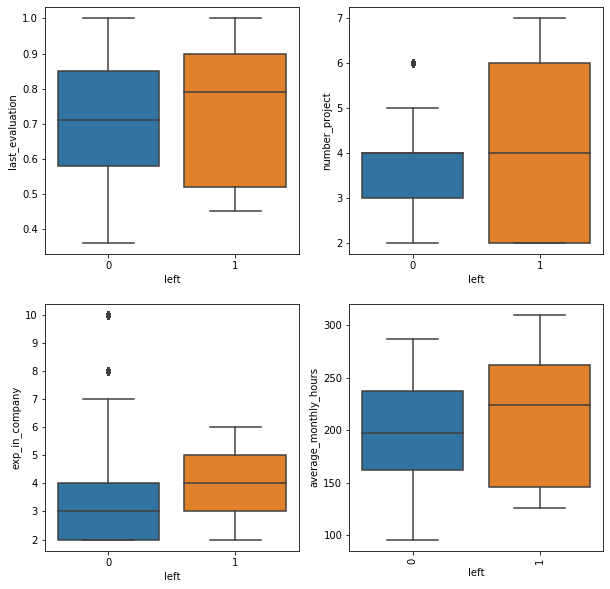

In [17]:
# Display multiple box plots.
#  Plot areas are called axes
#Monthly income vs Variables

fig,ax = plt.subplots(2,2, figsize=(10,10))                       # 'ax' has references to all the four axes
sns.boxplot(HR['left'], HR['last_evaluation'], ax = ax[0,0])  # Plot on 1st axes 
sns.boxplot(HR['left'], HR['number_project'], ax = ax[0,1])  # Plot on IInd axes
plt.xticks( rotation=90)
sns.boxplot(HR['left'], HR['exp_in_company'], ax = ax[1,0])       # Plot on IIIrd axes
plt.xticks( rotation=90)

sns.boxplot(HR['left'], HR['average_monthly_hours'], ax = ax[1,1])     # Plot on IV the axes
plt.show() 

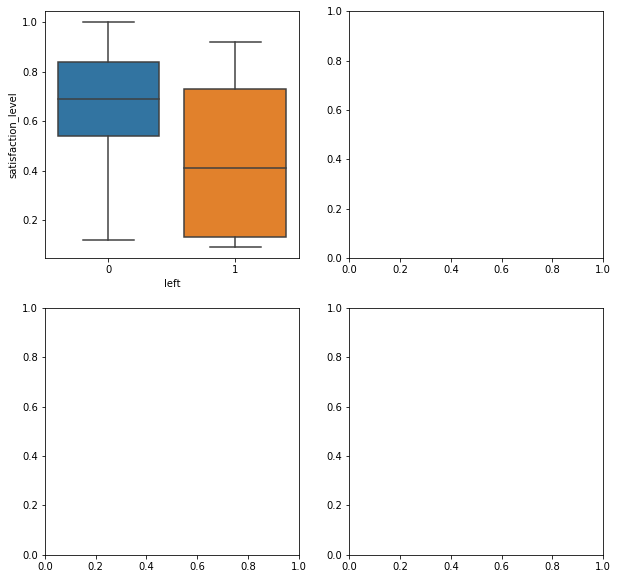

In [23]:
# Display multiple box plots.
#  Plot areas are called axes
#Monthly income vs Variables

fig,ax = plt.subplots(2,2, figsize=(10,10))                       # 'ax' has references to all the four axes
sns.boxplot(HR['left'], HR['satisfaction_level'],ax = ax[0,0])  # Plot on 1st axes

# Categorical Data Crosstab

In [52]:
pd.crosstab(HR.role, HR.left)

left,0,1
role,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [42]:
pd.crosstab(HR.promotion_last_5years, HR.left)

left,0,1
promotion_last_5years,,
0,11128,3553
1,300,19


In [53]:
pd.crosstab(HR.salary, HR.left)

left,0,1
salary,,
high,1155,82
low,5144,2173
medium,5129,1317


In [54]:
pd.crosstab(HR.work_accident, HR.left)

left,0,1
work_accident,,
0,9428,3403
1,2000,169


# Encoding Dataset

In [9]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [10]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in HR.columns[1:]:
    if HR[col].dtype == 'object':
        if len(list(HR[col].unique())) <= 2:
            le.fit(HR[col])
            HR[col] = le.transform(HR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

0 columns were label encoded.


In [11]:
# convert rest of categorical variable into dummy
HR = pd.get_dummies(HR, drop_first=True)

print(HR.shape)
HR.head()

(15000, 19)


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,exp_in_company,work_accident,left,promotion_last_5years,role_RandD,role_accounting,role_hr,role_management,role_marketing,role_product_mng,role_sales,role_support,role_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


# Feature Scaling = Normalization the variance

In [14]:
scaler=StandardScaler()
scaled_HR=scaler.fit_transform(HR.drop('left',axis=1))
X=scaled_HR
Y=HR['left'].as_matrix()

E:\New folder\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


# Splitting the data into training and validation sets

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# Important Variable

Text(0.5,1,'Correlation Heatmap')

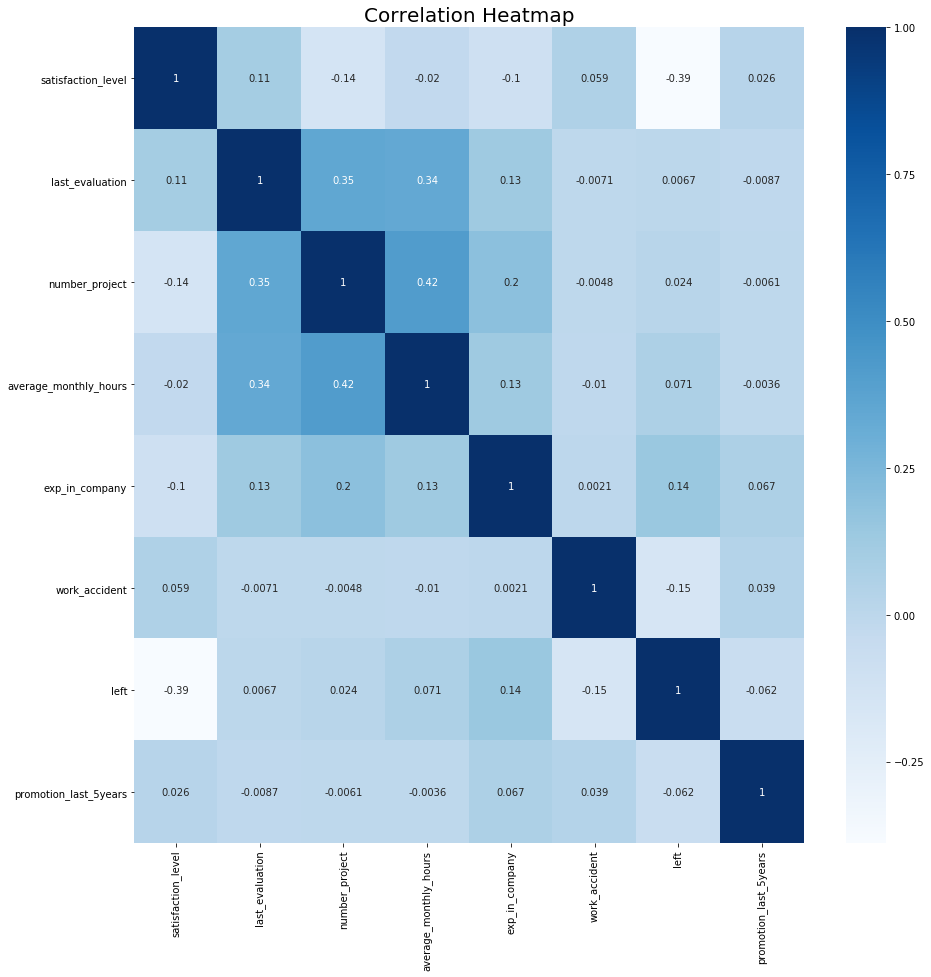

In [8]:
corr = HR.corr()                           # Calculate the correlation for each variables (inputs and target)
plt.figure(figsize=(15,15))                    # Set the size (width and height) of the correlation heat map that will be created
sns.heatmap(corr,annot=True, cmap="Blues")     # Genearate the heat map and use the blue gradient color
plt.title('Correlation Heatmap', fontsize=20)  # Set the title of the heatmap chart 

# Univariate Selection

In [16]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [17]:
X = HR.iloc[:,0:19]  #independent columns
y = HR.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                    Specs        Score
18          salary_medium  8554.000000
17             salary_low  5513.839373
6                    left    54.294302
7   promotion_last_5years    24.669445
11        role_management    13.546366
10                role_hr     9.476477
8              role_RandD     5.923498
3   average_monthly_hours     4.597072
4          exp_in_company     3.040705
0      satisfaction_level     1.483805


E:\New folder\envs\myenv\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.82670828e-03 1.53950326e-03 1.42614214e-03 2.01046084e-03
 1.44588326e-03 6.33432166e-04 1.97423871e-03 6.77908722e-04
 1.73369500e-04 1.43320155e-04 2.98116111e-04 1.80158440e-03
 1.43441614e-04 1.79700202e-04 3.98893028e-04 4.98957436e-04
 1.80651976e-04 3.04913444e-01 6.79734244e-01]


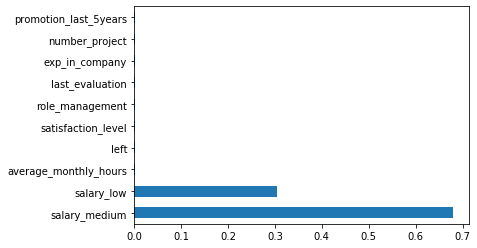

In [16]:
X = HR.iloc[:,0:49]  #independent columns
y = HR.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# RFE (Recursive Feature Elimination)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [18]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False False  True False False False  True False False
 False False  True False False  True  True]
[ 7  1  1 12  5  1  4  3 11  1  6  9 13 10  1  2  8  1  1]


In [19]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(x_train,y_train)
    X_test_rfe = rfe.transform(x_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 1.000000


In [20]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['last_evaluation', 'number_project', 'work_accident', 'left',
       'promotion_last_5years', 'role_accounting', 'role_sales',
       'role_support', 'salary_low', 'salary_medium'],
      dtype='object')


# Embedded Method

In [21]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [22]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

E:\New folder\envs\myenv\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.000245
Best score using built-in LassoCV: 0.999999


In [23]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 18 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

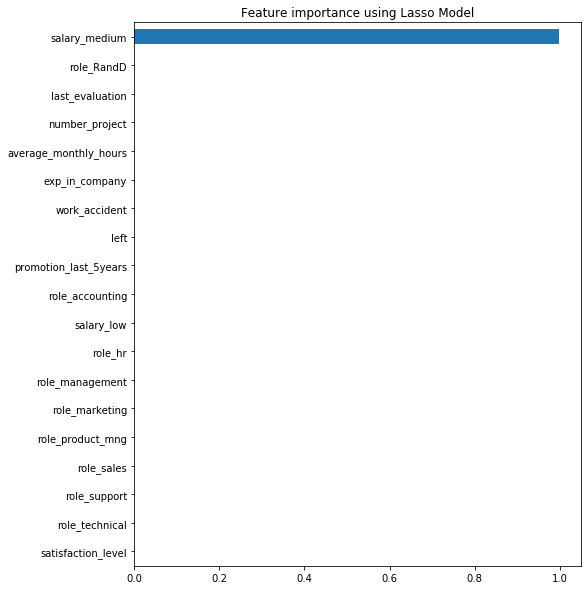

In [35]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")